# **(Machine) Learning to make decisions better '21-22**

# **Assignment - 4|| Qure case Study || Shuchismit Jha || P2021PTLP0040**

## Downloading the data & extracting images

In [ ]:
!wget https://www.dropbox.com/s/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip?dl=0

--2022-02-22 04:10:40--  https://www.dropbox.com/s/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip [following]
--2022-02-22 04:10:40--  https://www.dropbox.com/s/raw/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd0e9f99691f1eb33a2986c84e.dl.dropboxusercontent.com/cd/0/inline/BgIkcgW5Eis08dGuiORQb8QgaGM3pHkspvDLeHFTiMvNUViJx3so-ChJBQF33V9a2GSKv7pqoOcIR5toaj3Rda8XVXF76EBlXKTfHEQT1Ky8Pd_CYuVt0boBh8re4TY1_ObMNuFI55j2z-BgG7WHJdje/file# [following]
--2022-02-22 04:10:41--  https://ucdd0e9f99691f1eb33a2986c84e.dl.dropboxusercontent.com/cd/0/inline/BgIkcgW5Eis08dGuiORQb8Qga

In [ ]:
!unzip cxr_plaksha_assignment_qure.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: cxr_plaksha_assignment_qure/17686.png  
  inflating: cxr_plaksha_assignment_qure/3968.png  
  inflating: cxr_plaksha_assignment_qure/19873.png  
  inflating: cxr_plaksha_assignment_qure/16598.png  
  inflating: cxr_plaksha_assignment_qure/15091.png  
  inflating: cxr_plaksha_assignment_qure/6810.png  
  inflating: cxr_plaksha_assignment_qure/433.png  
  inflating: cxr_plaksha_assignment_qure/12926.png  
  inflating: cxr_plaksha_assignment_qure/355.png  
  inflating: cxr_plaksha_assignment_qure/13386.png  
  inflating: cxr_plaksha_assignment_qure/12098.png  
  inflating: cxr_plaksha_assignment_qure/8183.png  
  inflating: cxr_plaksha_assignment_qure/1819.png  
  inflating: cxr_plaksha_assignment_qure/10857.png  
  inflating: cxr_plaksha_assignment_qure/11591.png  
  inflating: cxr_plaksha_assignment_qure/4961.png  
  inflating: cxr_plaksha_assignment_qure/10843.png  
  inflating: cxr_plaksha_assignment_qure/11585.png  
  in

In [ ]:
!ls

 cxr_plaksha_assignment_qure		 drive
'cxr_plaksha_assignment_qure.zip?dl=0'	 sample_data


## Importing all required libraries

In [ ]:
import os
from tensorflow.keras.preprocessing import image
image_names = os.listdir('/content/cxr_plaksha_assignment_qure')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

## Preparing Train & Validation Data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Assignments/Machine_application/Qure/consolidation_train_gt.csv",dtype=str)
df.head(2)

,filename,consolidation,consolidation-left,consolidation-right
0,19047,0,0,0
1,17924,0,0,0


In [ ]:
df_new=df.drop(["consolidation-left","consolidation-right"],axis=1)
def append_ext(fn):
    return fn+".png"

df_new["filename"]=df_new["filename"].apply(append_ext)
df_new.head(2)

,filename,consolidation
0,19047.png,0
1,17924.png,0


In [ ]:
import os
import shutil

original = '/content/cxr_plaksha_assignment_qure'
new_path = '/content/new_data'


files_list = sorted(os.listdir(original))
file_names= df_new['filename']

for curr_file in file_names:
    shutil.copyfile(os.path.join(original, curr_file),
                    os.path.join(new_path, curr_file)) 

In [ ]:
df_new['consolidation'].value_counts()

0    11726
1     4274
Name: consolidation, dtype: int64

In [ ]:
all_images = pd.DataFrame(files_list)
all_images.columns =['Name']
all_images.head()

,Name
0,0.png
1,1.png
2,10.png
3,100.png
4,1000.png


In [ ]:
files_list_train = sorted(os.listdir(new_path))
train_images = pd.DataFrame(files_list_train)
train_images.columns =['Name']
train_images.head()

,Name
0,0.png
1,1.png
2,10.png
3,100.png
4,1000.png


### Preparing Test Data For prediction

In [ ]:
test_images = all_images[~all_images.Name.isin(train_images.Name)]
test_images.head()

,Name
19,10013.png
20,10014.png
29,10022.png
35,10028.png
38,10030.png


In [ ]:
test_images.shape

(4023, 1)

In [ ]:
# copying the images with names in the csv to another folder 
import os
import shutil

Actual = '/content/cxr_plaksha_assignment_qure'
test_images_path = '/content/test'

file_names= test_images['Name']

for curr_file in file_names:
  shutil.copyfile(os.path.join(Actual, curr_file),
                  os.path.join(test_images_path, curr_file)) 

In [ ]:
from keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import rmsprop_v2

## Model building

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape =(224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(2, activation = 'softmax')) # final layer we are perform binary classification so kept layer 1 & sigmoid
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.25,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   )

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_dataframe(directory='/content/new_data',
                                                 dataframe = df_new,
                                                 x_col="filename",
                                                 y_col="consolidation",
                                                 subset="training",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

Found 12000 validated image filenames belonging to 2 classes.


In [ ]:
train_datagen

In [ ]:
df_new

,filename,consolidation
0,19047.png,0
1,17924.png,0
2,11658.png,0
3,10733.png,0
4,15041.png,0
...,...,...
15995,2807.png,1
15996,16442.png,0
15997,8959.png,0
15998,18714.png,0


In [ ]:
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_dataframe(directory='/content/new_data',
                                                 dataframe = df_new,
                                                 x_col="filename",
                                                 y_col="consolidation",
                                                 subset="validation",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 seed=15,
                                                 class_mode = 'categorical')

Found 4000 validated image filenames belonging to 2 classes.


In [98]:
df_new.shape

(16000, 2)

## Model Performance Evaluation

In [ ]:
# fitting the model 
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

history = model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/6
375/375 [==============================] - 484s 1s/step - loss: 0.5935 - accuracy: 0.7309 - precision: 0.7309 - recall: 0.7309 - val_loss: 0.5783 - val_accuracy: 0.7303 - val_precision: 0.7303 - val_recall: 0.7303
Epoch 2/6
375/375 [==============================] - 438s 1s/step - loss: 0.5682 - accuracy: 0.7337 - precision: 0.7337 - recall: 0.7337 - val_loss: 0.5583 - val_accuracy: 0.7303 - val_precision: 0.7303 - val_recall: 0.7303
Epoch 3/6
375/375 [==============================] - 401s 1s/step - loss: 0.5569 - accuracy: 0.7337 - precision: 0.7337 - recall: 0.7337 - val_loss: 0.5455 - val_accuracy: 0.7303 - val_precision: 0.7303 - val_recall: 0.7303
Epoch 4/6
375/375 [==============================] - 399s 1s/step - loss: 0.5527 - accuracy: 0.7337 - precision: 0.7337 - recall: 0.7337 - val_loss: 0.5496 - val_accuracy: 0.7303 - val_precision: 0.7303 - val_recall: 0.7303
Epoch 5/6
375/375 [==============================] - 398s 1s/step - loss: 0.5506 - accuracy: 0.7337 - pr

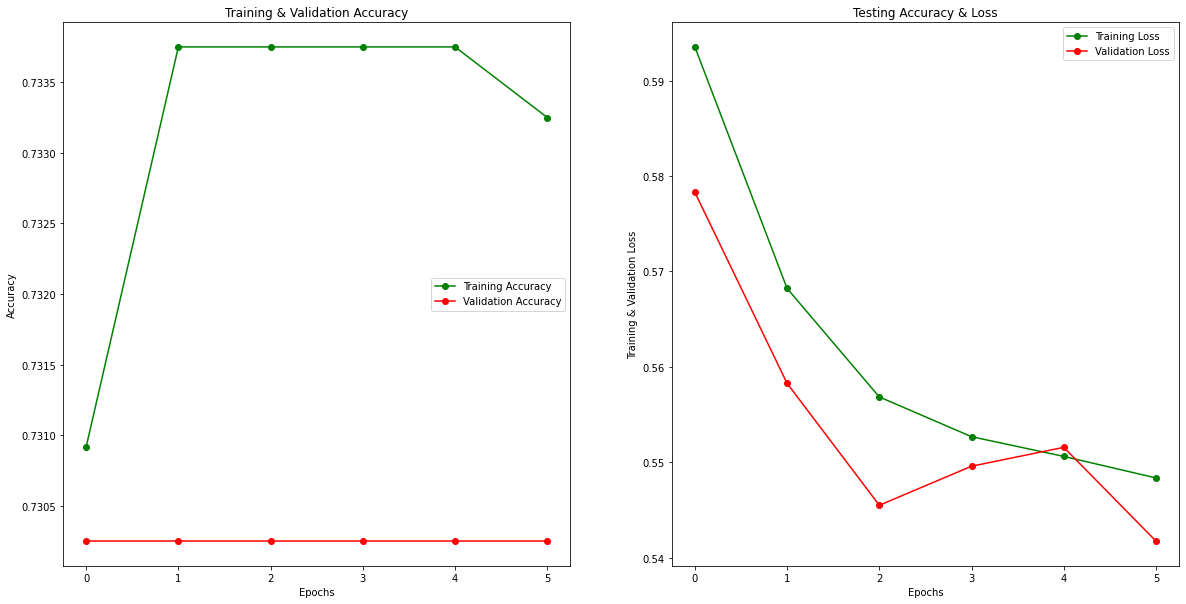

In [ ]:
epochs = [i for i in range(6)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
training_set.class_indices

{'0': 0, '1': 1}

In [ ]:
model.evaluate_generator(training_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5394325256347656,
 0.7337499856948853,
 0.7337499856948853,
 0.7337499856948853]

In [ ]:
model.evaluate_generator(validation_set)

In [28]:
#prediction = model.predict_classes('1')
predict_x=model.predict(validation_set) 
classes_x=np.argmax(predict_x)
classes_x

2176

## Predicting on remaining 20% Test Data

In [29]:
y_tests = []
for i in os.listdir("/content/test/"):
  img = image.load_img("/content/test/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis =0)
  predict_x=model.predict(img) 
  classes_x=np.argmax(predict_x)
  y_tests.append(classes_x)

In [ ]:
predsss = model.predict(img)
print(predsss.shape)

In [31]:
Target_test = pd.DataFrame(y_tests)
Target_test.columns =['Target']
Target_test.head()

,Target
0,0
1,0
2,0
3,0
4,1


In [32]:
Target_test.value_counts()

Target
0         3948
1           75
dtype: int64

In [33]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_images,
directory="/content/test/",
x_col="Name",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

Found 4023 validated image filenames.


In [34]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


125/125 [==============================] - 68s 543ms/step


In [35]:
pred

array([[0.692201  , 0.307799  ],
       [0.73353595, 0.26646402],
       [0.8416113 , 0.1583886 ],
       ...,
       [0.6613781 , 0.3386219 ],
       [0.85406417, 0.14593588],
       [0.7416633 , 0.2583367 ]], dtype=float32)

In [36]:
temp = pd.DataFrame(pred)
temp

,0,1
0,0.692201,0.307799
1,0.733536,0.266464
2,0.841611,0.158389
3,0.660848,0.339152
4,0.703063,0.296937
...,...,...
3995,0.770109,0.229891
3996,0.724253,0.275747
3997,0.661378,0.338622
3998,0.854064,0.145936


In [37]:
predicted_class_indices=np.argmax(pred,axis=1)

In [38]:
predicted_class_indices

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [40]:
df_r = pd.DataFrame(predictions)

In [41]:
df_r.columns =['Predictions']

In [42]:
df_r.value_counts()

Predictions
0              4000
dtype: int64

In [43]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results.head()

,Filename
0,10013.png
1,10014.png
2,10022.png
3,10028.png
4,10030.png


In [44]:
results['predictions'] = df_r['Predictions']
results.head()

,Filename,predictions
0,10013.png,0
1,10014.png,0
2,10022.png,0
3,10028.png,0
4,10030.png,0


In [45]:
model.save('model_base.h5')

# Using Transfer learning - VGG 16 Model

In [46]:
from tensorflow.keras.optimizers import Adam
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [47]:
from keras.applications.vgg16 import VGG16, preprocess_input

BATCH_SIZE = 32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=2

n_steps = training_set.samples // BATCH_SIZE
n_val_steps = validation_set.samples // BATCH_SIZE
n_epochs = 15

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

58900480/58889256 [==============================] - 1s 0us/step


In [48]:
pip install livelossplot

In [49]:
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping
plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')


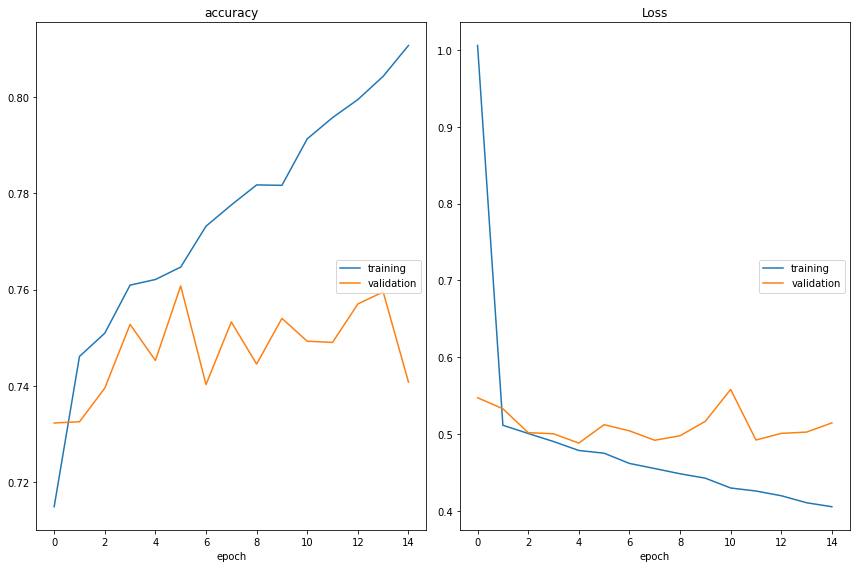

accuracy
	training         	 (min:    0.715, max:    0.811, cur:    0.811)
	validation       	 (min:    0.732, max:    0.761, cur:    0.741)
Loss
	training         	 (min:    0.405, max:    1.006, cur:    0.405)
	validation       	 (min:    0.488, max:    0.558, cur:    0.515)
375/375 [==============================] - 399s 1s/step - loss: 0.4054 - accuracy: 0.8108 - val_loss: 0.5145 - val_accuracy: 0.7408
CPU times: user 1h 41min 32s, sys: 2min 18s, total: 1h 43min 50s
Wall time: 1h 42min 48s


In [50]:
%%time 

vgg_history = vgg_model.fit(training_set,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validation_set,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

### Checking performance on Validation data

In [51]:
# Generate predictions
vgg_model.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights
true_classes_val = validation_set.classes
class_indices = training_set.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
vgg_preds_val = vgg_model.predict(validation_set)
vgg_pred_classes_val = np.argmax(vgg_preds_val, axis=1)

from sklearn.metrics import accuracy_score
vgg_acc_val = accuracy_score(true_classes_val, vgg_pred_classes_val)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc_val * 100))

VGG16 Model Accuracy without Fine-Tuning: 70.08%


### Predicting class labels for unseen test data i.e. remaining 4000

In [52]:
# Loading predictions from last article's model
vgg_preds = vgg_model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [53]:
df_predicted_labels_for_test = pd.DataFrame(vgg_pred_classes)
df_predicted_labels_for_test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [54]:
df_predicted_labels_for_test.columns =['Predictions']
df_predicted_labels_for_test.value_counts()

Predictions
0              3741
1               282
dtype: int64

## Fine Tuning - VGG16

In [55]:
# Reset our image data generators
training_set.reset()
validation_set.reset()
test_generator.reset()

# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model(input_shape, n_classes, optim_2, fine_tune=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


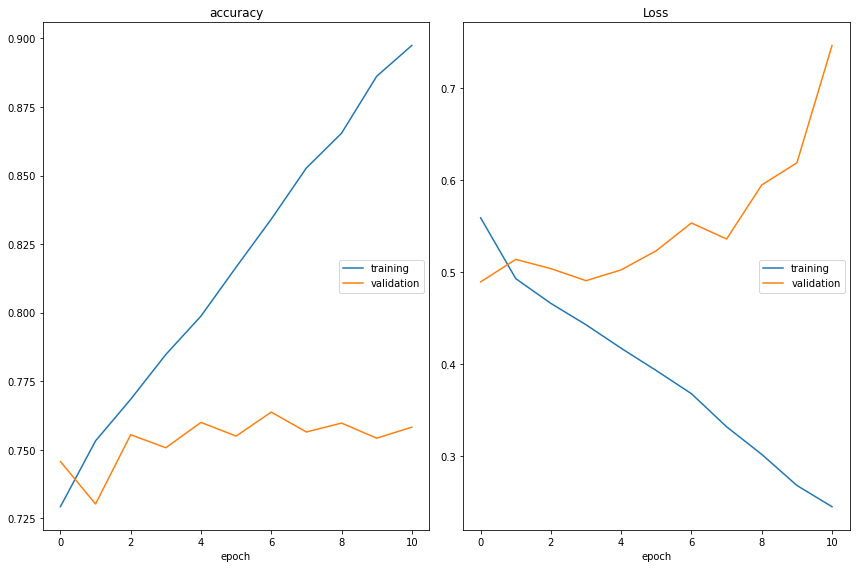

accuracy
	training         	 (min:    0.729, max:    0.897, cur:    0.897)
	validation       	 (min:    0.730, max:    0.764, cur:    0.758)
Loss
	training         	 (min:    0.245, max:    0.559, cur:    0.245)
	validation       	 (min:    0.490, max:    0.747, cur:    0.747)
375/375 [==============================] - 399s 1s/step - loss: 0.2453 - accuracy: 0.8974 - val_loss: 0.7465 - val_accuracy: 0.7582
CPU times: user 1h 15min 9s, sys: 1min 33s, total: 1h 16min 43s
Wall time: 1h 14min 2s


In [56]:
%%time

plot_loss_2 = PlotLossesCallback()

# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(training_set,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validation_set,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

### Prediction on test to be used later

In [110]:
vgg_preds_train = vgg_model_ft.predict(training_set)
vgg_preds_train

array([[0.56005865, 0.43994138],
       [0.97401434, 0.02598561],
       [0.47150314, 0.5284968 ],
       ...,
       [0.8178161 , 0.18218386],
       [0.65562105, 0.34437892],
       [0.9824572 , 0.01754274]], dtype=float32)

In [112]:
vgg_pred_classes_ft_train = np.argmax(vgg_preds_train, axis=1)
vgg_pred_classes_ft_train

array([0, 0, 1, ..., 0, 0, 0])

## Checking performance on validation data

In [57]:
# Generate predictions
vgg_model_ft.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights
true_classes_val = validation_set.classes
vgg_preds_ft_val = vgg_model_ft.predict(validation_set)
vgg_pred_classes_ft_val = np.argmax(vgg_preds_ft_val, axis=1)

vgg_acc_ft_val = accuracy_score(true_classes_val, vgg_pred_classes_ft_val)
print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc_ft_val * 100))

VGG16 Model Accuracy with Fine-Tuning: 69.73%


### Predicting class label for unseen data i.e. 4000

In [58]:
# Loading predictions from last article's model
vgg_preds_ft = vgg_model_ft.predict(test_generator)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)
df_predicted_labels_for_test_ft = pd.DataFrame(vgg_pred_classes_ft)
df_predicted_labels_for_test_ft.head()

,0
0,0
1,0
2,0
3,0
4,0


In [59]:
df_predicted_labels_for_test_ft.columns =['Predictions']
df_predicted_labels_for_test_ft.value_counts()

Predictions
0              3741
1               282
dtype: int64

In [143]:
df_predicted_labels_for_test_ft.to_csv('Predictions_labels_4000_unseen_test_data_with_VGG16_fine_tuned.csv')

## Checking on pre trained base model

In [60]:
from keras.models import load_model
scratch_model = load_model('/content/model_base.h5')
scratch_preds_validation = scratch_model.predict(validation_set)
scratch_pred_classes_validation = np.argmax(scratch_preds_validation, axis=1)
true_classes_val= validation_set.classes

scratch_acc_validation = accuracy_score(true_classes_val, scratch_pred_classes_validation)
print("From Scratch Model Accuracy with Fine-Tuning: {:.2f}%".format(scratch_acc_validation * 100))

From Scratch Model Accuracy with Fine-Tuning: 73.02%


## Checking Performance through confusion matrix

### Checking on Validation data

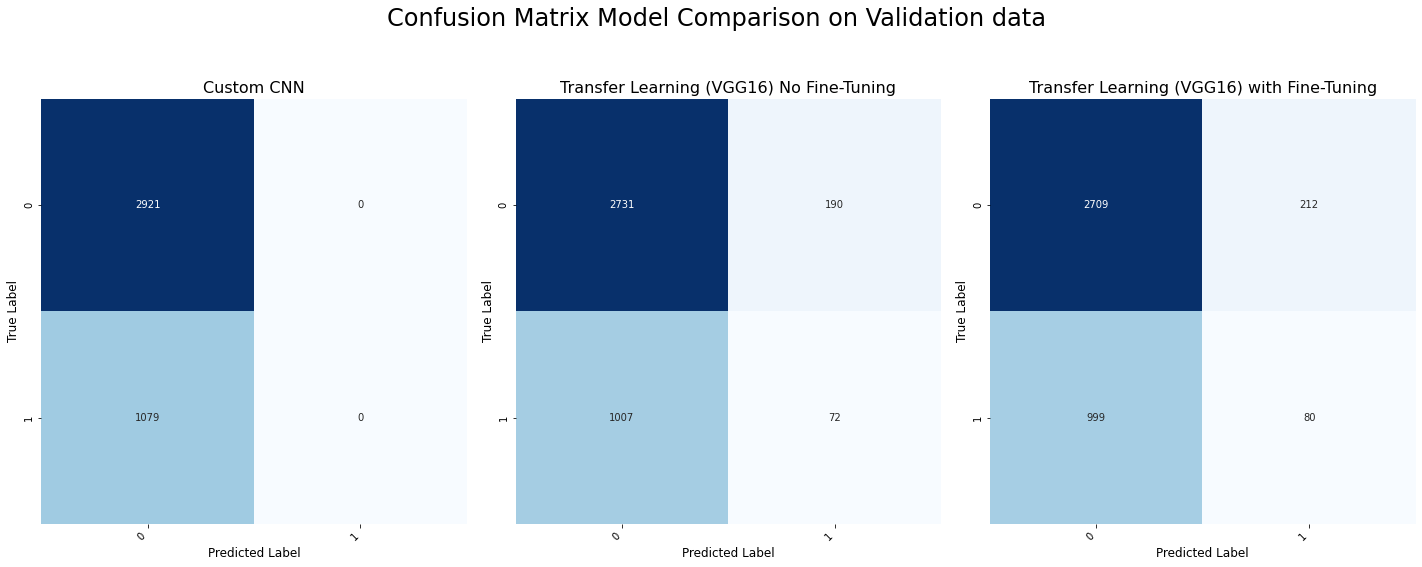

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Get the names of the ten classes
class_names = validation_set.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_heatmap(true_classes_val, scratch_pred_classes_validation, class_names, ax1, title="Custom CNN")    
plot_heatmap(true_classes_val, vgg_pred_classes_val, class_names, ax2, title="Transfer Learning (VGG16) No Fine-Tuning")    
plot_heatmap(true_classes_val, vgg_pred_classes_ft_val, class_names, ax3, title="Transfer Learning (VGG16) with Fine-Tuning")    

fig.suptitle("Confusion Matrix Model Comparison on Validation data", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.10)
plt.show()


## Finding Confidence i.e. Probability of consolidation on train, test & validation

In [96]:
vgg_pred_classes_ft_val

array([0, 0, 1, ..., 0, 0, 0])

In [105]:
# Create a dataframe with filenames
filenames = os.listdir("/content/new_data/")
categories = []
new_filenames = []
for filename in filenames:
    filename = "/content/new_data/" + filename
    new_filenames.append(filename)

train_df = pd.DataFrame({
    'filename': new_filenames,
})
train_df.head()

,filename
0,/content/new_data/6869.png
1,/content/new_data/9989.png
2,/content/new_data/73.png
3,/content/new_data/6694.png
4,/content/new_data/9650.png


In [114]:
all_preds_16K = pd.DataFrame(vgg_pred_classes_ft_train)

In [115]:
only_val = pd.DataFrame(vgg_pred_classes_ft)

In [117]:
all_16K = pd.concat([all_preds_16K,only_val], ignore_index = True)
all_16K.head()

,0
0,0
1,0
2,1
3,1
4,0


In [120]:
all_16K.columns =['category']
all_16K.head()

,category
0,0
1,0
2,1
3,1
4,0


In [121]:
all_16K.shape

(16023, 1)

In [122]:
train_df['category'] = all_16K['category']
train_df.head()

,filename,category
0,/content/new_data/6869.png,0
1,/content/new_data/9989.png,0
2,/content/new_data/73.png,1
3,/content/new_data/6694.png,1
4,/content/new_data/9650.png,0


In [123]:
train_df.shape

(15977, 2)

### Finding probability of consolidation on given data i.e. 16000 data for which true labels are known

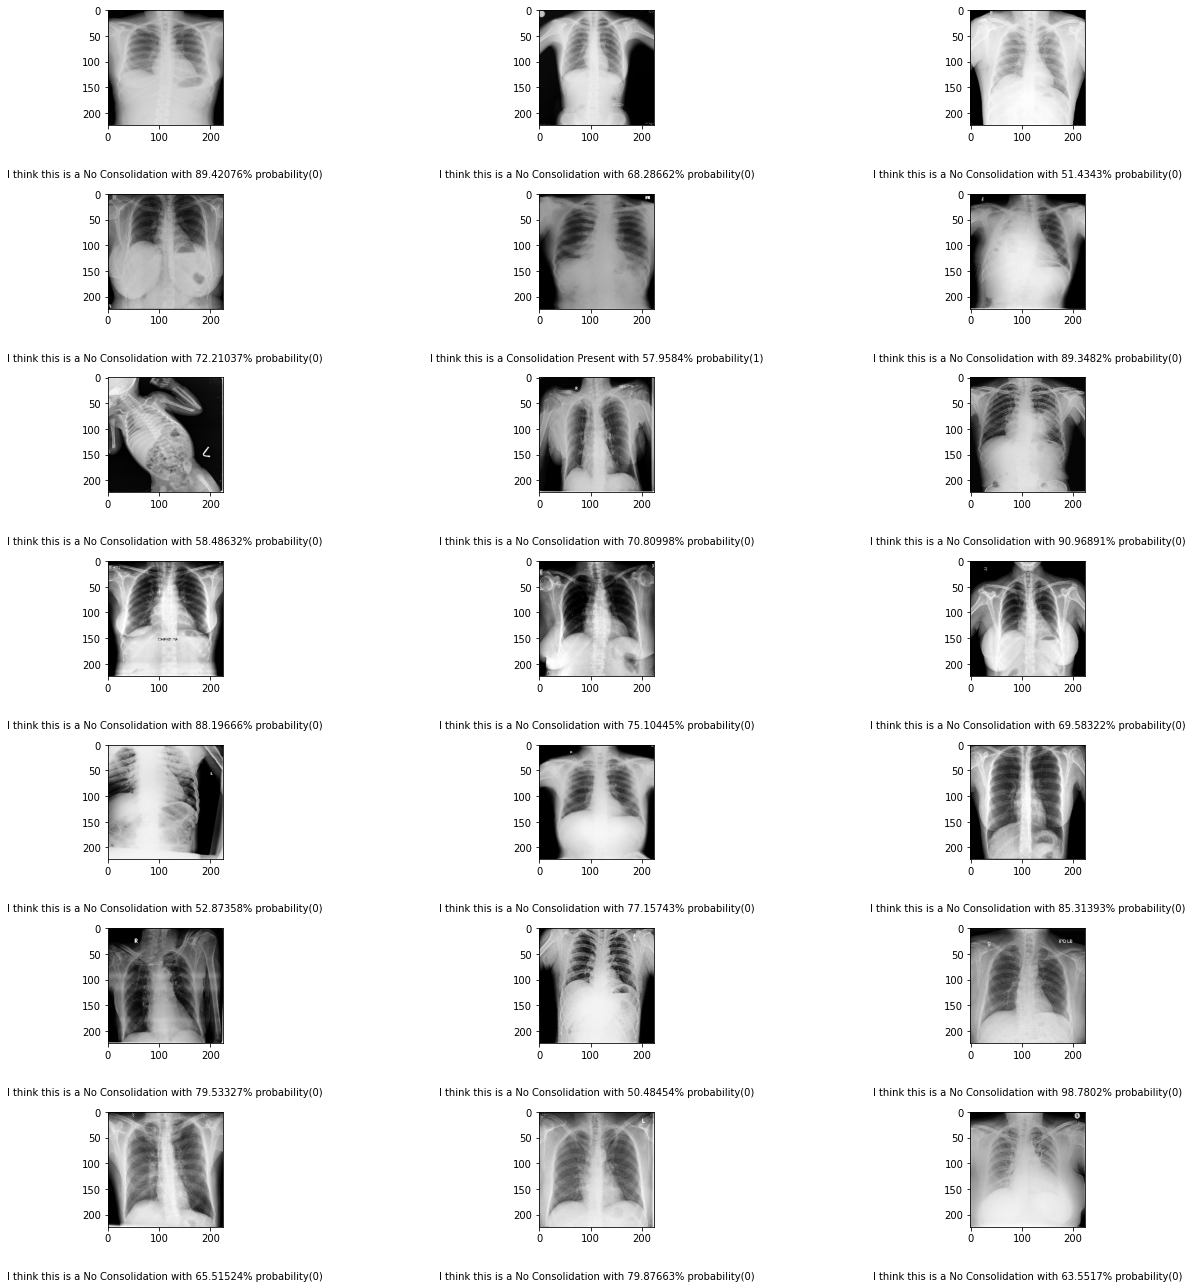

In [129]:
from keras.preprocessing.image import load_img
sample_test = train_df.sample(n=21).reset_index()
sample_test.head()
plt.figure(figsize=(18, 18))
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_ft_val[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    plt.subplot(7, 3, index+1)
    plt.imshow(img)
    if category == 0:
        class_guess = 'No Consolidation'
    else:
        class_guess = 'Consolidation Present'
    pred_label = '\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability'
    plt.xlabel(pred_label + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

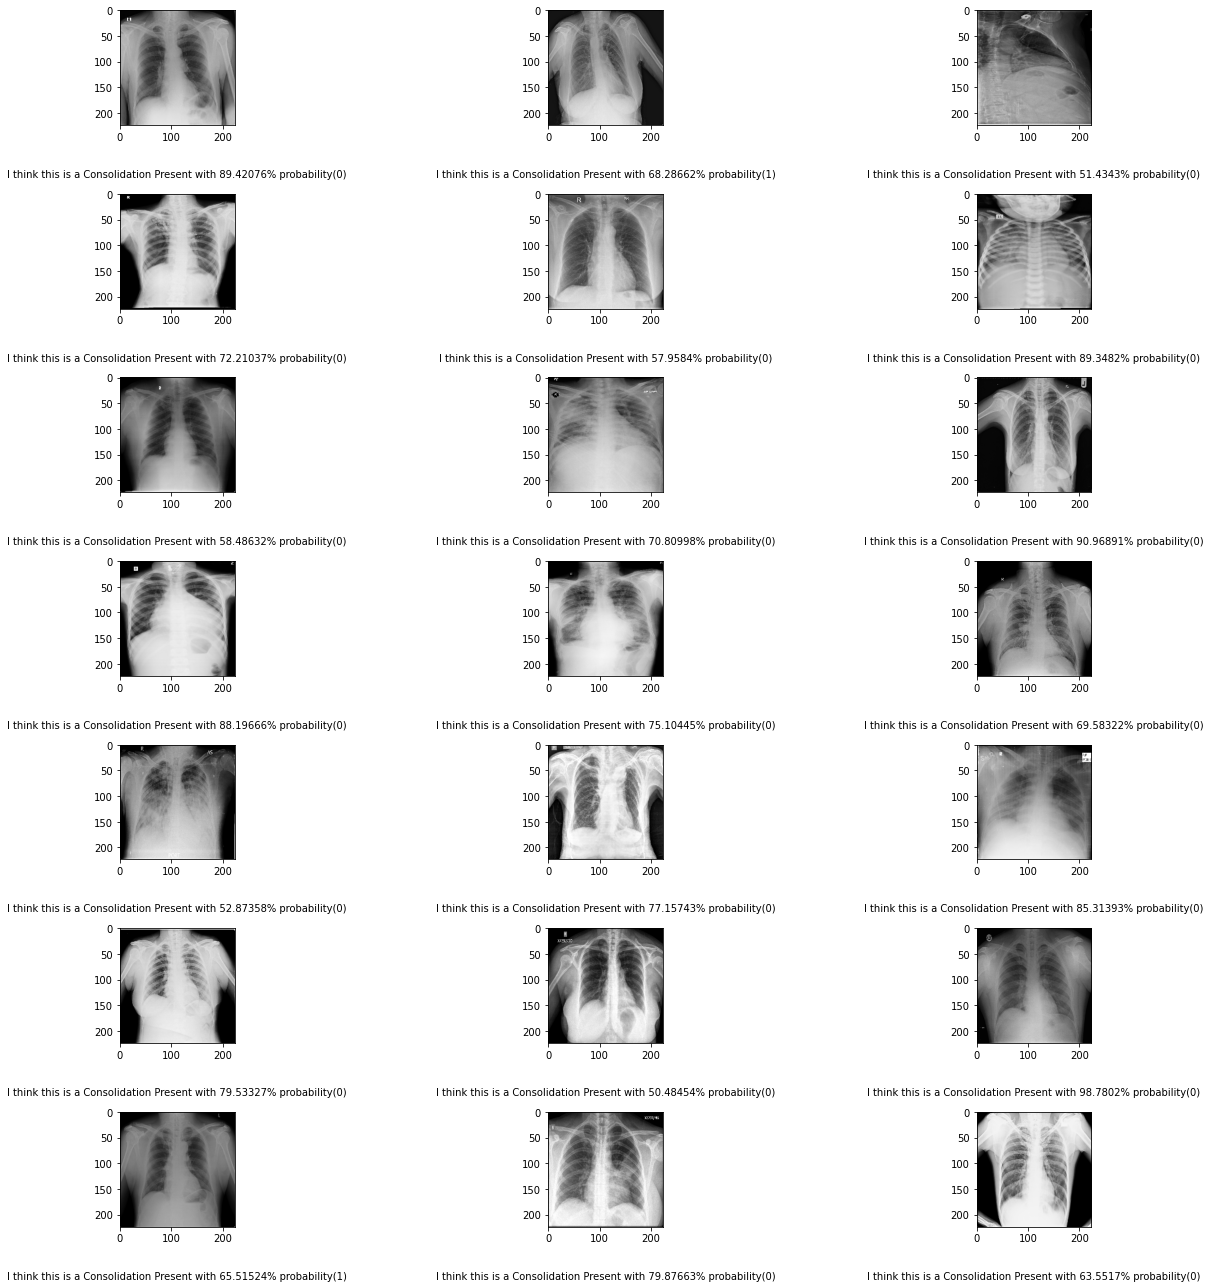

In [128]:
from keras.preprocessing.image import load_img
sample_test = train_df.sample(n=21).reset_index()
sample_test.head()
plt.figure(figsize=(18, 18))
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_ft_val[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    plt.subplot(7, 3, index+1)
    plt.imshow(img)
    if category == 1:
        class_guess = 'Consolidation Present'
        
    pred_label = '\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability'
    plt.xlabel(pred_label + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [135]:
from keras.preprocessing.image import load_img
sample_test = train_df.tail(4000).reset_index()
sample_test.head()
probability_val = []
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_ft_val[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    if category == 1:
        class_guess = 'Consolidation Present'
        result_tes = filename + ' has consolidation with ' +  str(round(float(prob_pred)*100,2))+ '% probability'
        probability_val.append(result_tes)

In [136]:
from keras.preprocessing.image import load_img
sample_test = train_df.head(12000).reset_index()
sample_test.head()
probability_tr = []
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_train[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    if category == 1:
        class_guess = 'Consolidation Present'
        result_tes = filename + ' has consolidation with ' +  str(round(float(prob_pred)*100,2))+ '% probability'
        probability_tr.append(result_tes)

In [134]:
probability_train = pd.DataFrame(probability_tr)
probability_train.columns =['Probability of consolidation']
probability_train.head(5)

,Probability of consolidation
0,/content/new_data/73.png has consolidation wit...
1,/content/new_data/6694.png has consolidation w...
2,/content/new_data/7845.png has consolidation w...
3,/content/new_data/9530.png has consolidation w...
4,/content/new_data/1282.png has consolidation w...


In [137]:
probability_validation = pd.DataFrame(probability_val)
probability_validation.columns =['Probability of consolidation']
probability_validation.head(5)

,Probability of consolidation
0,/content/new_data/5550.png has consolidation w...
1,/content/new_data/10331.png has consolidation ...
2,/content/new_data/395.png has consolidation wi...
3,/content/new_data/429.png has consolidation wi...
4,/content/new_data/8022.png has consolidation w...


In [138]:
Probability_consolidation_16000_images = pd.concat([probability_train, probability_validation], ignore_index = True)
Probability_consolidation_16000_images.head()

,Probability of consolidation
0,/content/new_data/73.png has consolidation wit...
1,/content/new_data/6694.png has consolidation w...
2,/content/new_data/7845.png has consolidation w...
3,/content/new_data/9530.png has consolidation w...
4,/content/new_data/1282.png has consolidation w...


In [141]:
Probability_consolidation_16000_images.to_csv('Probability_consolidation_16000_images.csv')

### Finding probability of consolidation on Test Data i.e. 4000 data for which true labels are not known

In [67]:
# Create a dataframe with filenames
filenames = os.listdir("/content/test/")
categories = []
new_filenames = []
for filename in filenames:
    filename = "/content/test/" + filename
    new_filenames.append(filename)

test_df = pd.DataFrame({
    'filename': new_filenames,
})
test_df.head()

,filename
0,/content/test/9459.png
1,/content/test/6069.png
2,/content/test/14660.png
3,/content/test/17536.png
4,/content/test/17739.png


In [68]:
vgg_pred_classes_ft

array([0, 0, 0, ..., 1, 0, 0])

In [69]:
test_df['category'] = vgg_pred_classes_ft
test_df.head()

,filename,category
0,/content/test/9459.png,0
1,/content/test/6069.png,0
2,/content/test/14660.png,0
3,/content/test/17536.png,0
4,/content/test/17739.png,0


In [70]:
test_df.category.value_counts()

0    3741
1     282
Name: category, dtype: int64

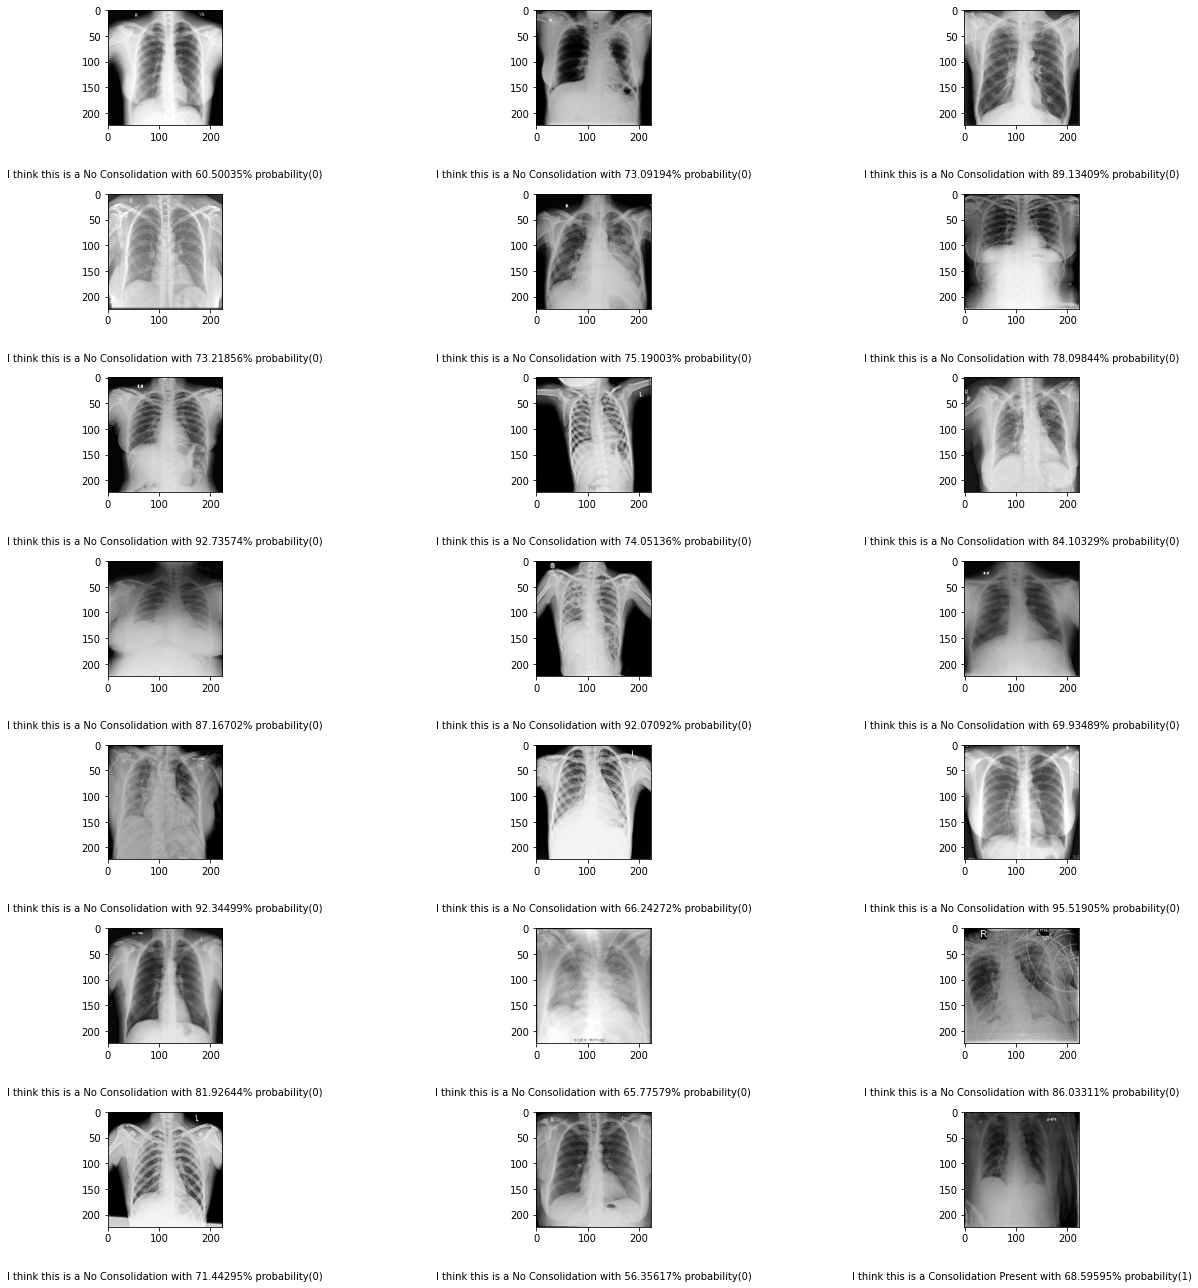

In [75]:
from keras.preprocessing.image import load_img
sample_test = test_df.sample(n=21).reset_index()
sample_test.head()
plt.figure(figsize=(18, 18))
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_ft[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    plt.subplot(7, 3, index+1)
    plt.imshow(img)
    if category == 0:
        class_guess = 'No Consolidation'
    else:
        class_guess = 'Consolidation Present'
    pred_label = '\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability'
    plt.xlabel(pred_label + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [92]:
from keras.preprocessing.image import load_img
sample_test = test_df.reset_index()
sample_test.head()
row = []
probability = []
for index, row in sample_test.iterrows():
    prob_pred = np.max(vgg_preds_ft[index])
    filename = row['filename']
    category = row['category']
    img = load_img(filename, target_size=(224, 224))
    if category == 1:
        class_guess = 'Consolidation Present'
        result_tes = filename + ' has consolidation with ' +  str(round(float(prob_pred)*100,2))+ '% probability'
        probability.append(result_tes)

In [93]:
probability

['/content/test/1347.png has consolidation with 51.52% probability',
 '/content/test/12333.png has consolidation with 54.18% probability',
 '/content/test/14473.png has consolidation with 52.58% probability',
 '/content/test/14495.png has consolidation with 52.54% probability',
 '/content/test/4462.png has consolidation with 53.06% probability',
 '/content/test/19.png has consolidation with 54.02% probability',
 '/content/test/4192.png has consolidation with 57.96% probability',
 '/content/test/1457.png has consolidation with 53.75% probability',
 '/content/test/16762.png has consolidation with 55.52% probability',
 '/content/test/11204.png has consolidation with 53.05% probability',
 '/content/test/8366.png has consolidation with 50.26% probability',
 '/content/test/7639.png has consolidation with 50.74% probability',
 '/content/test/11126.png has consolidation with 53.26% probability',
 '/content/test/10664.png has consolidation with 53.28% probability',
 '/content/test/13605.png has

In [100]:
test_df_consolidation = test_df.loc[test_df['category'] == 1]
test_df_consolidation['Probability of consolidation on test'] = probability
test_df_consolidation.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,filename,category,Probability of consolidation on test
57,/content/test/1347.png,1,/content/test/1347.png has consolidation with ...
73,/content/test/12333.png,1,/content/test/12333.png has consolidation with...
106,/content/test/14473.png,1,/content/test/14473.png has consolidation with...
110,/content/test/14495.png,1,/content/test/14495.png has consolidation with...
113,/content/test/4462.png,1,/content/test/4462.png has consolidation with ...


In [142]:
test_df_consolidation.to_csv('Probability_consolidation_4000_test_images.csv')